In [10]:
import pandas as pd

df_covid_AP = pd.read_csv('../lung_pollution/data/covid_pollution_clean.csv')

df_covid_AP.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace = True)
df_covid_AP = df_covid_AP.rename(columns={"PM2.5_annualMean": "PM2_5_annualMean", "Fully vaccinated": "Fully_vaccinated", "Population density": "Population_density"})

In [11]:
df_covid_AP.columns

Index(['county', 'year', 'NO2_annualMean', 'NO2_hrOver200', 'NO_annualMean',
       'O3_annualMean', 'O3_daysOver120', 'O3_dailyMaxAnnualMean',
       'O3_dailyHourlyMax', 'O3_daily8HrMax', 'PM10_annualMean',
       'PM10_daysOver50', 'PM2_5_annualMean', 'BL', 'EWZ', 'Shape__Area',
       'death_rate', 'cases', 'deaths', 'cases_per_100k', 'deaths_per_100k',
       'Fully_vaccinated', 'Population_density'],
      dtype='object')

In [12]:
df_covid_AP.sort_values(['year'], axis=0, ascending=False,inplace=True,ignore_index=True)
df_covid_AP_2019 = df_covid_AP[0:400]

In [13]:
X_train = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax','PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']]
X_test_poll = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']]
X_test_vaxx = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']]
y_train = df_covid_AP_2019[['cases_per_100k']]
X_train.head()

,NO2_annualMean,NO_annualMean,O3_daily8HrMax,PM2_5_annualMean,Fully_vaccinated,Population_density
0,8.702983,0.743928,170.913300,12.572421,0.715,789.975585
1,16.479730,8.244184,162.577275,12.535452,0.699,109.629819
2,17.933774,9.534453,162.327283,12.607750,0.715,198.518661
3,16.770445,8.410734,162.274333,12.494203,0.663,126.216795
4,16.763028,8.367538,162.801752,12.731934,0.699,253.440020


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # Instanciate Robust Scaler

scaler.fit(X_train)  # Fit scaler to feature
scaled_num = scaler.transform(X_train)  #Scale
X_train = pd.DataFrame(scaled_num, columns = X_train.columns)

In [15]:
from sklearn.ensemble import  RandomForestRegressor

forest = RandomForestRegressor(min_samples_leaf=3, min_samples_split=3, n_estimators=201)

forest.fit(X_train,y_train)

print('R2 RandomForest: ', forest.score(X_train,y_train))


/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_85767/3732284810.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train,y_train)


R2 RandomForest:  0.8501802611440147


In [16]:
X_test_poll['PM2_5_annualMean'] = 5
X_test_poll['NO2_annualMean'] = 10
X_test_poll['O3_daily8HrMax'] = 100
X_test_vaxx['Fully_vaccinated'] = 1
X_test_poll.head()

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_85767/3259262090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_poll['PM2_5_annualMean'] = 5
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_85767/3259262090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_poll['NO2_annualMean'] = 10
/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_85767/3259262090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

,NO2_annualMean,NO_annualMean,O3_daily8HrMax,PM2_5_annualMean,Fully_vaccinated,Population_density
0,10,0.743928,100,5,0.715,789.975585
1,10,8.244184,100,5,0.699,109.629819
2,10,9.534453,100,5,0.715,198.518661
3,10,8.410734,100,5,0.663,126.216795
4,10,8.367538,100,5,0.699,253.440020


In [17]:
X_test_vaxx.head()

,NO2_annualMean,NO_annualMean,O3_daily8HrMax,PM2_5_annualMean,Fully_vaccinated,Population_density
0,8.702983,0.743928,170.913300,12.572421,1,789.975585
1,16.479730,8.244184,162.577275,12.535452,1,109.629819
2,17.933774,9.534453,162.327283,12.607750,1,198.518661
3,16.770445,8.410734,162.274333,12.494203,1,126.216795
4,16.763028,8.367538,162.801752,12.731934,1,253.440020


In [18]:
scaled_test_poll = scaler.transform(X_test_poll)
scaled_test_vaxx = scaler.transform(X_test_vaxx)

In [19]:
y_pred_poll = forest.predict(scaled_test_poll)
y_pred_vaxx = forest.predict(scaled_test_vaxx)

/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/dorienroosen/.pyenv/versions/3.8.12/envs/lung_pollution/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [25]:
X_test_poll = df_covid_AP_2019[['NO2_annualMean', 'NO_annualMean', 'O3_daily8HrMax', 'PM2_5_annualMean', 'Fully_vaccinated', 'Population_density']]
#X_test_poll['PM2_5_annualMean'] = 5
X_test_poll['NO2_annualMean'] = 10
#X_test_poll['O3_daily8HrMax'] = 100
#X_test_vaxx['Fully_vaccinated'] = 1
X_test_poll.head()

/var/folders/py/ydbm54f573b1ymf9x65hf0mm0000gn/T/ipykernel_85767/1536437811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_poll['NO2_annualMean'] = 10


,NO2_annualMean,NO_annualMean,O3_daily8HrMax,PM2_5_annualMean,Fully_vaccinated,Population_density
0,10,0.743928,170.913300,12.572421,0.715,789.975585
1,10,8.244184,162.577275,12.535452,0.699,109.629819
2,10,9.534453,162.327283,12.607750,0.715,198.518661
3,10,8.410734,162.274333,12.494203,0.663,126.216795
4,10,8.367538,162.801752,12.731934,0.699,253.440020


<AxesSubplot:ylabel='Count'>

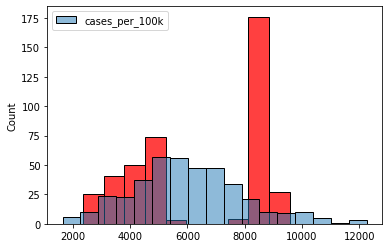

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(y_pred_poll, color='red')
sns.histplot(y_train, color='blue')

<AxesSubplot:ylabel='Count'>

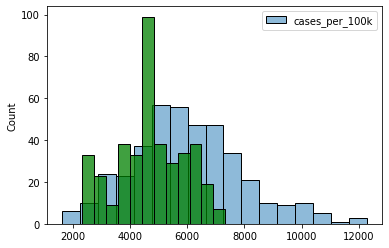

In [21]:
sns.histplot(y_train, color='blue')
sns.histplot(y_pred_vaxx, color='green')